In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load IndividualDetails data as df

df = pd.read_csv("/Users/arsh/MFDS-Project/Term-project-2020/Dataset_Question3/IndividualDetails.csv")

In [3]:
# drop id column

df = df.drop(['id'], axis=1)

In [4]:
# offset index by 1

df.index += 1

In [5]:
# index values with diagnosed date as 10/04/2020

np.where(df["diagnosed_date"] == '10/04/2020')

(array([6728, 6729, 6730, 6731, 6732, 6733, 6734, 6735, 6736, 6737, 6738,
        6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749,
        6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760,
        6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771,
        6772, 6773, 6774, 6775, 6776, 6777, 6778, 6779, 6780, 6781, 6782,
        6783, 6784, 6785, 6786, 6787, 6788, 6789, 6790, 6791, 6792, 6793,
        6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801, 6802, 6803, 6804,
        6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813, 6814, 6815,
        6816, 6817, 6818, 6819, 6820, 6821, 6822, 6823, 6824, 6825, 6826,
        6827, 6828, 6829, 6830, 6831, 6832, 6833, 6834, 6835, 6836, 6837,
        6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846, 6847, 6848,
        6849, 6850, 6851, 6852, 6853, 6854, 6855, 6856, 6857, 6858, 6859,
        6860, 6861, 6862, 6863, 6864, 6865, 6866, 6867, 6868, 6869, 6870,
        6871, 6872, 6873, 6874, 6875, 

In [6]:
# taking only dates upto 10/04/2020

required_data = df[df.index <= 7599]

In [8]:
# Create a data frame containing data of only hospitalized people 

df_with_only_hospitalized = required_data[required_data['current_status'] == 'Hospitalized']

In [9]:
# Removing data with missing details about districts 

df_hospitalized_no_na = df_with_only_hospitalized[df_with_only_hospitalized['detected_district'].notna()]

In [11]:
# Create object with number of cases per district

no_of_cases_by_district = df_hospitalized_no_na.groupby(['detected_district']).size()

In [12]:
# change object to data frame 

no_of_cases_by_district = no_of_cases_by_district.to_frame()

In [14]:
# rename index column 

no_of_cases_by_district.rename({0 : 'no_of_cases'}, axis = 1, inplace=True)

In [15]:
# creating new data frame that contains only districts that are 'hotspots'

hotspots = no_of_cases_by_district[no_of_cases_by_district['no_of_cases'] >= 10]

In [16]:
# left join 2 dfs

no_of_hotspots=pd.merge(hotspots,df_hospitalized_no_na,how='left',on='detected_district')

In [17]:
# remove all datapoints containing same value of detected_district

no_of_hotspots.drop_duplicates(subset ="detected_district",keep = 'first', inplace = True) 

In [18]:
# keep only mentioned columns

hotspots_state_district = no_of_hotspots[['detected_district', 'detected_state', 'no_of_cases']]

In [19]:
# reset index values

hotspots_state_district = hotspots_state_district.reset_index().drop(['index'], axis = 1)

## Submit

In [20]:
## Required submission

hotspots_state_district

,detected_district,detected_state,no_of_cases
0,Adilabad,Telangana,10
1,Agra,Uttar Pradesh,83
2,Ahmadabad,Gujarat,195
3,Ahmadnagar,Maharashtra,25
4,Akola,Maharashtra,12
5,Amritsar,Punjab,11
6,Anantapur,Andhra Pradesh,15
7,Aurangabad,Maharashtra,17
8,Badgam,Jammu and Kashmir,11
9,Bandipore,Jammu and Kashmir,38


In [26]:
# export df to excel

hotspots_state_district.to_excel(r'/Users/arsh/MFDS-Project/Q4_data_to_be_submitted.xlsx', index = False)

In [21]:
# making a list containing names of all hotspots(districts)

districts = hotspots_state_district['detected_district'].tolist()


In [22]:
# make an object of number of hotspots in each state

no_of_hotspots_by_state = hotspots_state_district.groupby(['detected_state']).size()

In [23]:
# convert object to data frame

no_of_hotspots_by_state = no_of_hotspots_by_state.to_frame()

In [24]:
# rename index column

no_of_hotspots_by_state.rename({0 : 'no_of_hotspots'}, axis = 1, inplace = True)

## Submit

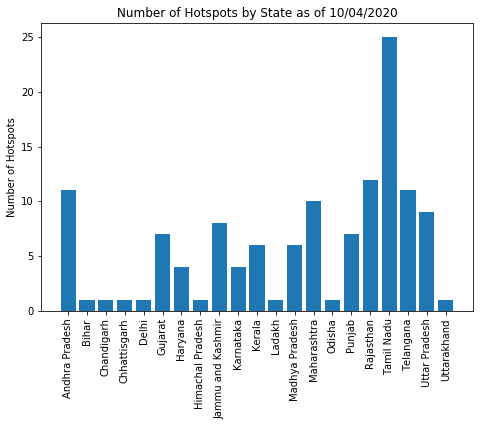

In [25]:
# required visualization

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(no_of_hotspots_by_state.index, no_of_hotspots_by_state.no_of_hotspots)
plt.xticks(rotation=90)
ax.set_title('Number of Hotspots by State as of 10/04/2020')
ax.set_ylabel('Number of Hotspots')
plt.show()